**connect to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam
from keras.callbacks import  EarlyStopping
from keras.utils import to_categorical

In [ ]:
csv_path = '/content/drive/MyDrive/a-z/A_Z Handwritten Data.csv'

# Load CSV file into a DataFrame
data = pd.read_csv(csv_path)
# data.head()

 **data shuffling**

In [ ]:
data = shuffle(data)
data.shape

(372450, 785)

**split data to train and test**

In [ ]:
X = data.drop('0',axis = 1)
y = data['0']
# print(X)
# print("........................................................................")
# print(y)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28,1))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28,1))



**# Plot a sample of dataset**

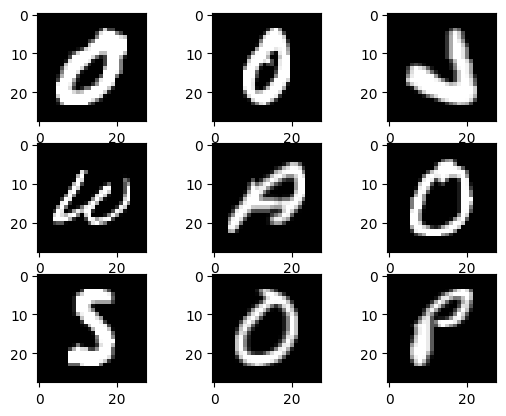

In [ ]:
for i in range(9):
	plt.subplot(3,3,i+1)
	# plot raw pixel data
	plt.imshow(train_x[i],cmap=plt.get_cmap('gray'))
plt.show()

**reashape datset**

In [ ]:
print("The new shape of train data: ", train_x.shape)
print("The new shape of train data: ", test_x.shape)
# One Hot Encoding
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("The new shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("The new shape of test labels: ", test_yOHE.shape)

The new shape of train data:  (297960, 28, 28, 1)
The new shape of train data:  (74490, 28, 28, 1)
The new shape of train labels:  (297960, 26)
The new shape of test labels:  (74490, 26)


**Data Preparation**

In [ ]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
train_X,test_X=prep_pixels(train_X,test_X)

** builde the model**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=35, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(64,activation ="relu"))
model.add(Dense(26,activation ="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 35)        6335      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 35)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          10112     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 32)          0


**# Evaluate Model Performance**

In [ ]:
model.compile(optimizer = SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5)
history = model.fit(train_X, train_yOHE, epochs=10, validation_data = (test_X,test_yOHE), callbacks=[early_stopping])


Epoch 1/10
9312/9312 [==============================] - 260s 28ms/step - loss: 1.9710 - accuracy: 0.4656 - val_loss: 0.6999 - val_accuracy: 0.7892
Epoch 2/10
9312/9312 [==============================] - 255s 27ms/step - loss: 0.4701 - accuracy: 0.8607 - val_loss: 0.3419 - val_accuracy: 0.9004
Epoch 3/10
9312/9312 [==============================] - 261s 28ms/step - loss: 0.2977 - accuracy: 0.9132 - val_loss: 0.2490 - val_accuracy: 0.9298
Epoch 4/10
9312/9312 [==============================] - 259s 28ms/step - loss: 0.2361 - accuracy: 0.9320 - val_loss: 0.2180 - val_accuracy: 0.9383
Epoch 5/10
9312/9312 [==============================] - 256s 27ms/step - loss: 0.2001 - accuracy: 0.9432 - val_loss: 0.1965 - val_accuracy: 0.9442
Epoch 6/10
9312/9312 [==============================] - 282s 30ms/step - loss: 0.1762 - accuracy: 0.9498 - val_loss: 0.1625 - val_accuracy: 0.9547
Epoch 7/10
9312/9312 [==============================] - 258s 28ms/step - loss: 0.1588 - accuracy: 0.9547 - val_loss: 0

In [ ]:
evaluation = model.evaluate(test_X, test_yOHE)

print("Loss: {:.4f}".format(evaluation[0]))
print("Accuracy: {:.2%}".format(evaluation[1]))

2328/2328 [==============================] - 23s 10ms/step - loss: 0.1367 - accuracy: 0.9610
Loss: 0.1367
Accuracy: 96.10%


In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(test_X)
# Convert predictions and true labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_yOHE, axis=1)

# Calculate confusion matrix
conf_matrix = classification_report(true_classes, predicted_classes)
print("conf_matrix :")
print(conf_matrix)

2328/2328 [==============================] - 20s 9ms/step
conf_matrix :
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2803
           1       0.97      0.92      0.95      1759
           2       0.95      0.98      0.96      4702
           3       0.95      0.90      0.92      2097
           4       0.98      0.91      0.95      2246
           5       0.96      0.93      0.95       233
           6       0.91      0.92      0.92      1139
           7       0.93      0.88      0.91      1372
           8       0.97      0.81      0.88       228
           9       0.81      0.96      0.88      1680
          10       0.93      0.93      0.93      1121
          11       0.97      0.97      0.97      2349
          12       0.95      0.97      0.96      2421
          13       0.94      0.97      0.95      3837
          14       0.98      0.98      0.98     11531
          15       0.98      0.97      0.98      3792
         

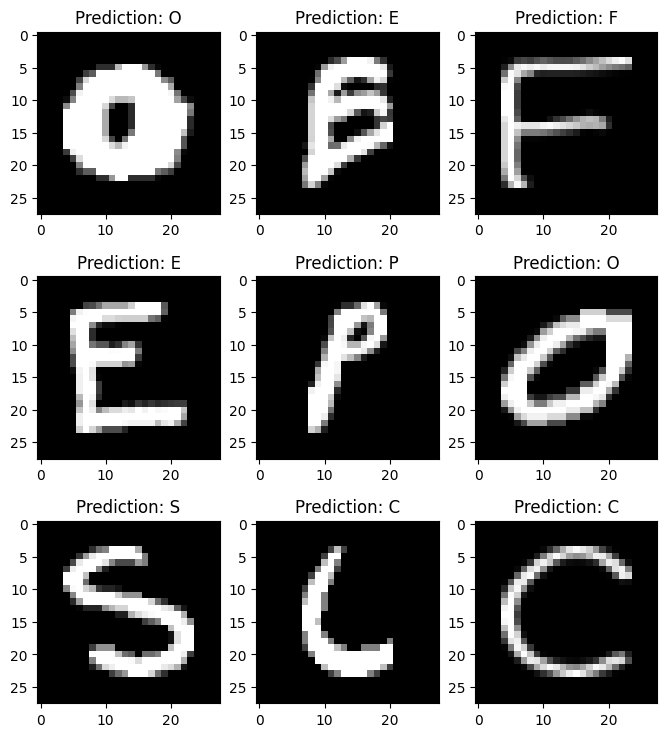

In [ ]:
# Prediction on test data
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
              18: 'S',19: 'T', 20:'U',21 :'V',22:'W',23:'X', 24:'Y',25:'Z'}
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))

    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)

** LeNet-5 model**

In [ ]:
from keras.layers import AveragePooling2D

# Define LeNet-5 model
def build_lenet5(input_shape, num_classes):
    model2 = Sequential()

    # Layer 1: Convolutional + Pooling
    model2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model2.add(AveragePooling2D(pool_size=(2, 2)))

    # Layer 2: Convolutional + Pooling
    model2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model2.add(AveragePooling2D(pool_size=(2, 2)))

    # Flatten before fully connected layers
    model2.add(Flatten())

    # Layer 3: Fully Connected
    model2.add(Dense(units=120, activation='relu'))

    # Layer 4: Fully Connected
    model2.add(Dense(units=84, activation='relu'))

    # Output layer
    # model2.add(Dense(units=num_classes, activation='softmax'))
    model2.add(Dense(units=26, activation='softmax'))

    return model2

# Assuming input images are 28x28 pixels (adjust accordingly)
input_shape = (28, 28, 1)

# Number of classes (adjust based on your problem)
num_classes = 26

# Build LeNet-5 model
model2 = build_lenet5(input_shape, num_classes)

# Display model summary
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
from keras.losses import categorical_crossentropy
model2.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5)
history = model2.fit(train_X, train_yOHE, epochs=5, validation_data = (test_X,test_yOHE), callbacks=[early_stopping])

Epoch 1/5
9312/9312 [==============================] - 98s 10ms/step - loss: 0.1797 - accuracy: 0.9489 - val_loss: 0.0863 - val_accuracy: 0.9751
Epoch 2/5
9312/9312 [==============================] - 96s 10ms/step - loss: 0.0689 - accuracy: 0.9800 - val_loss: 0.0606 - val_accuracy: 0.9823
Epoch 3/5
9312/9312 [==============================] - 96s 10ms/step - loss: 0.0522 - accuracy: 0.9848 - val_loss: 0.0514 - val_accuracy: 0.9849
Epoch 4/5
9312/9312 [==============================] - 94s 10ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0444 - val_accuracy: 0.9873
Epoch 5/5
9312/9312 [==============================] - 96s 10ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0497 - val_accuracy: 0.9856


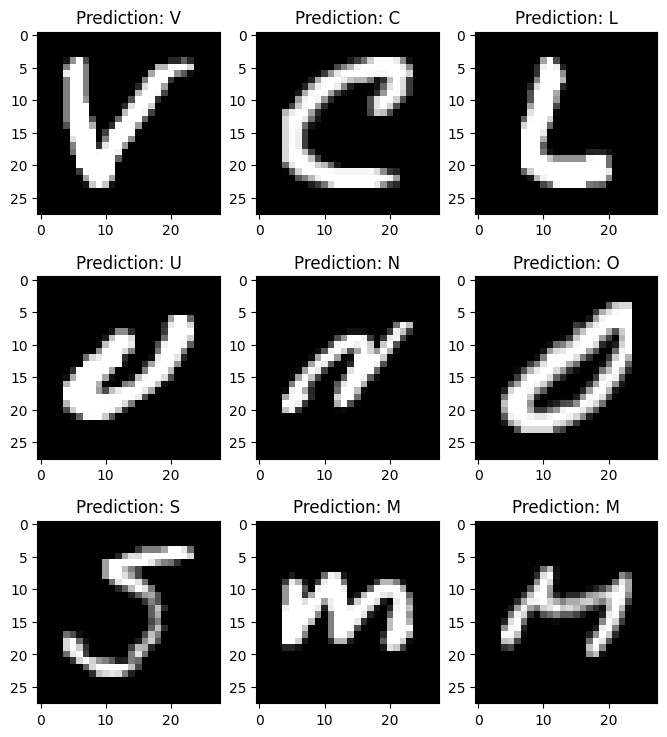

In [ ]:
# Prediction on test data
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))

    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)